# Part 8 - NLP Analysis of Reviews

## Overview

This project is an extension of the successful movies project. This portion focuses on applying Natural Language Processing (NLP) techniques to analyze a dataset of movie reviews. The ultimate goal is to establish a relationship between the textual content of the reviews and their associated ratings and subsequently predict these ratings.

#### Dataset: TMDB Movie Reviews

[![Image](https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1700174921__pastedimage0.png)](https://drive.google.com/file/d/10XnBycJ2bGStZJ2kWoyzZRrInKJlaiYZ/view?usp=sharing)

[TMDB movie reviews](https://drive.google.com/file/d/1vLUzSYleJXqsjNMsq76yTQ5fmNlSHFJI/view?usp=sharing). Ratings range from 1 to 10

<!-- - Gathered through the tmdbsimple python wrapper for the TMDB API. To legally cite TMDB, please follow their attribution requirements, which we have [summarized here](https://docs.google.com/document/d/1LzFQDulDdQjiMuZ8sBYeDbHnN62ZWjFU_xt_4eSwVIw/edit?usp=sharing).
 -->


## Tasks:
<!-- 
**0) Update Your Project 2 Repo**

- Create a new "Data-NLP/" folder in your Project 2 repository.
- Add the downloaded review file to this new Data-NLP folder.

- Make sure you have an "Images/" folder. If not, create one.

 -->

**1) Data Preprocessing:**

- Load and inspect the dataset.
    - How many reviews?
    - What does the distribution of ratings look like?
    - Any null values?



- Use the rating column to create a new target column with two groups: high-rating and low-rating groups.
    - We recommend defining "High-rating" reviews as any review with a rating >=9; and "Low-rating" reviews as any review with a rating <=4. The middle ratings between 4 and 9 will be excluded from the analysis.
    - You may use an alternative definition for High and Low reviews, but justify your choice in your notebook/README.



- Utilize NLTK and SpaCy for basic text processing, including:

    - removing stopwords
    - tokenization
    - lemmatization
    - Tips:
        - Be sure to create a custom nlp object and disable the named entity recognizer. Otherwise, processing will take a very long time!
        - **You will want to create several versions of the data, lemmatized, tokenized, lemmatized, and joined back to one string per review, and tokenized and joined back to one string per review.** This will be useful for different analysis and modeling techniques.

    

- Save your processed data frame in a **joblib** file saved in the "Data-NLP/" folder for future modeling.

    

**2) EDA and Visualization:**

- Create word clouds to visualize the most frequent and significant words in each group.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your wordclouds as .png files in the "Images/" folder in your repo.**



- Apply nltk's `FreqDist` class to compare the frequency distribution of words in the review groups.
    - Remember, you can use this analysis to identify additional custom EDA stop words to use for visualization. (e.g., if the words are common in both groups)
    - **Save your freq dist plots as .png files in the "Images/" folder in your repo.**



- Perform n-grams analysis (bigrams and trigrams),
    - Remember, you can use this analysis to identify additional custom stop words to use for EDA. (e.g., if the words are common in both groups)
    - Focus on bigrams or trigrams, using NLTK's `BigramCollocationFinder` and BigramAssocMeasures classes (or the Trigram equivalent Finder and Measures) to explore commonly used groups of words for each rating-group.
    - Describe any differences. What do these differences tell you?
    - Save your



- Perform sentiment analysis to create polarity scores according to VADERS's sentiment lexicon.

    - Compare the sentiments of high-rating and low-rating texts.

    - Compare the average sentiment scores for high and low-rating reviews.

    - Which review polarity scores don't match the ratings? Why do you think this is?

        

**3) Evaluation and Reporting:**

- Based on your analyses, what should someone do (or not do) if they want to make a highly-rated movie?
    - List 3 things associated with high-rating reviews
    - List 3 things associated with low-rating reviews.



**Deliverables:**

1. Notebook files for preprocessing and EDA
2. EDA Images saved in an "Images folder.
3. These should be submitted as the link to a repository with an appropriate name (NOT "Project 2"). Note: you can rename your project on GitHub.com by clicking on the Settings for your repo. The first option should be "Repository Name"





#### Support and References:

- Students are encouraged to consult the official documentation of NLTK, SpaCy, wordcloud, and Scikit-Learn, as well as the Learn Platform.

In [3]:
## Run code to get reproducible results BEFORE anything else
import tensorflow as tf
import numpy as np

# Then Set Random Seeds
tf.keras.utils.set_random_seed(42)
tf.random.set_seed(42)
np.random.seed(42)

# Then run the Enable Deterministic Operations Function
tf.config.experimental.enable_op_determinism()

# Source: https://discuss.tensorflow.org/t/upgrading-os-to-sonoma-on-my-mac-causing-tensorflow-errors/19846/5
tf.config.set_visible_devices([], 'GPU')

In [4]:
import os, sys, joblib
# sys.path.append(os.path.abspath("../NLP/"))
# sys.path.append(os.path.abspath("../"))
# sys.path.append(os.path.abspath("../../"))
%load_ext autoreload
%autoreload 2
    
import custom_functions as fn

## Files to Track
-  `data`:
    -  Full dataframe of dataset used
    -  EDA/preview DataFrame
    -  Data from Machine Learning (ML) Models (if applicable):
        -  train-data.joblib (X_train, y_train)
        -  test-data.joblib (X_test, y_test)
    -  Data from Neural Network (NN) Models (if applicable):
        -  TF records (saving Tensorflow Datasets)
     
-  `models`:
    -  for Machine Learning (ML): joblib file or tensorflow model folder)
    -  for Neural Networks (NN): saved keras model folder.
 
- `images`:
    - App assets (e.g. banner png image)
    - Saved Figures
    
- `config`:
    - a file for tracking all of the filepaths above.

In [5]:
from pprint import pprint

FPATHS = dict(
    data={
        "raw": {
            "full": "Data-NLP/tmdb-movie-reviews.csv.gz",
            "eda": "Data-NLP/eda-movie-reviews.csv.gz",
            "processed-joblib": "Data-NLP/processed-movie-reviews.joblib",
            # "groups-dict": "Data-NLP/grouped-data-dict.joblib",
        },
        "ml": {
            "train": "Data-NLP/training-data.joblib",  # (X_train,y_train)
            "test": "Data-NLP/testing-data.joblib",  # (X_test,y_test)
        },
        "nn": {
            "train": "data/training-data-tf/",  # train_ds
            "test": "data/testing-data-tf/",  # test_ds
        },
    },
    models={
        # Machine Learning Models and results
        "ml": {
            "bayes": {
                "saved_model": "Models/bayes-clf.joblib",
                "results": "models/results/bayes/",
            },
            "random_forest": {
                "saved_model": "Models/random-forest.joblib",
                "results": "Models/results/random-forest/",
            },
        },
        # Neural networks and results
        "nn": {
            "LSTM": {
                "saved_model": "Models/keras/lstm/",
                "results": "Models/results/lstm/results/",
            },
            "Attention": {
                "saved_model": "models/keras/attn/",
                "results": "models/results/attn/results/",
            },
        },
    },
    images={
        "banner": "images/app-banner.png",
    },
    # Additional metadata (target lookup,etc.)
    metadata={
        "target_lookup": "Data-NLP/target-lookup.json",
    },
    # Any images to be displayed in the app
    eda={
        "wordclouds": "EDA/wordclouds-compare.png",
        "scattertext": "EDA/scattertext.html",
    },
)
fn.utils.create_directories_from_paths(FPATHS)

pprint(FPATHS)

# fn.deploy.save_filepath_config(FPATHS)
# pprint(FPATHS)

import json

## Save the filepaths
import os

os.makedirs("config/", exist_ok=True)
FPATHS_FILE = "config/filepaths.json"
with open(FPATHS_FILE, "w") as f:
    json.dump(FPATHS, f)

{'data': {'ml': {'test': 'Data-NLP/testing-data.joblib',
                 'train': 'Data-NLP/training-data.joblib'},
          'nn': {'test': 'data/testing-data-tf/',
                 'train': 'data/training-data-tf/'},
          'raw': {'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
                  'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
                  'processed-joblib': 'Data-NLP/processed-movie-reviews.joblib'}},
 'eda': {'scattertext': 'EDA/scattertext.html',
         'wordclouds': 'EDA/wordclouds-compare.png'},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'models': {'ml': {'bayes': {'results': 'models/results/bayes/',
                             'saved_model': 'Models/bayes-clf.joblib'},
                   'random_forest': {'results': 'Models/results/random-forest/',
                                     'saved_model': 'Models/random-forest.joblib'}},
            'nn': {'Attention': {'results': 'models/res

In [6]:
with open("config/filepaths.json") as f:
    FPATHS = json.load(f)
FPATHS

{'data': {'raw': {'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
   'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
   'processed-joblib': 'Data-NLP/processed-movie-reviews.joblib'},
  'ml': {'train': 'Data-NLP/training-data.joblib',
   'test': 'Data-NLP/testing-data.joblib'},
  'nn': {'train': 'data/training-data-tf/', 'test': 'data/testing-data-tf/'}},
 'models': {'ml': {'bayes': {'saved_model': 'Models/bayes-clf.joblib',
    'results': 'models/results/bayes/'},
   'random_forest': {'saved_model': 'Models/random-forest.joblib',
    'results': 'Models/results/random-forest/'}},
  'nn': {'LSTM': {'saved_model': 'Models/keras/lstm/',
    'results': 'Models/results/lstm/results/'},
   'Attention': {'saved_model': 'models/keras/attn/',
    'results': 'models/results/attn/results/'}}},
 'images': {'banner': 'images/app-banner.png'},
 'metadata': {'target_lookup': 'Data-NLP/target-lookup.json'},
 'eda': {'wordclouds': 'EDA/wordclouds-compare.png',
  'scattertext': 'EDA/scattertext.html'}}

In [7]:
FPATHS['data']['raw']

{'full': 'Data-NLP/tmdb-movie-reviews.csv.gz',
 'eda': 'Data-NLP/eda-movie-reviews.csv.gz',
 'processed-joblib': 'Data-NLP/processed-movie-reviews.joblib'}

In [8]:
# ## Save the filepaths 
# import os, json
# os.makedirs('config/', exist_ok=True)
# FPATHS_FILE = 'config/filepaths.json'
# with open(FPATHS_FILE, 'w') as f:
#     json.dump(FPATHS, f)

## ✅ To Do:


- [ ] Move notebook functions to project_functions.py
- [ ] Add NLP EDA by
    - ...Rating?
    - Profit?
- [ ] 

# Analysis

In [9]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from pprint import pprint
from sklearn import set_config
set_config(transform_output='pandas')

pd.set_option('display.max_colwidth', 250)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno

pd.set_option('display.max_columns',100)


import nltk
import wordcloud
import gzip, json

import matplotlib.pyplot as plt
import seaborn as sns
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [10]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import (CountVectorizer,TfidfTransformer, 
                                             TfidfVectorizer,ENGLISH_STOP_WORDS)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import nltk 
from nltk import TweetTokenizer, word_tokenize,wordpunct_tokenize
import string
from wordcloud import WordCloud



from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## #NOT THE MOST RECENT VERSIONS!!!!
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Load Data

In [11]:
LOAD_PREVIOUS = False

In [14]:
fpath_eda_data =FPATHS['data']['raw']['eda']
fpath_eda_joblib =FPATHS['data']['raw']['processed-joblib']
# fpath_group_dict = FPATHS['data']['raw']['groups-dict']


if LOAD_PREVIOUS == True:
    
    # df = pd.read_csv(fpath_eda_data)
    # df.info()
    # display(df.head())
    df = joblib.load(fpath_eda_joblib)
    GROUP_TEXTS = joblib.load(fpath_group_dict)
else:
    raw_data = FPATHS['data']['raw']['full']
    df = pd.read_csv(raw_data) 
df

,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I l...",2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
8645,575264,64ba5c5706f98400e1169ed0,7.0,"I'm not really a great fan of Tom Cruise. Yes, he does his own stunts and is as fit as a fiddle, but as an actor - well don't let's have too many scenes that require him to actually put his heart and soul into them. Luckily, there are only a few ...",2023-07-21 10:22:15.048000+00:00
8646,575264,64bdab4dad50f0013b127c02,6.0,"Spectacular cinematic action let down by an incoherent story and shallow characterisations. \r\n\r\nAs is almost always the case with the MI franchise, the latest offering dishes up spectacular, highly polished, explosive action. Regrettably it c...",2023-07-23 22:35:58.004000+00:00
8647,575264,64cca28c43cd5400add62db6,9.0,"The Tom Cruise “Mission Impossible” franchise is one of reliable quality and equally dependable “forgettable-ness.” I’ve seen every film, yet my memory is fuzzy when I try to recall what happened in any of them. And while it’s almost a given that...",2023-08-04 07:02:36.097000+00:00
8648,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervious one. But loved it,2023-10-17 08:44:40.250000+00:00


<Axes: >

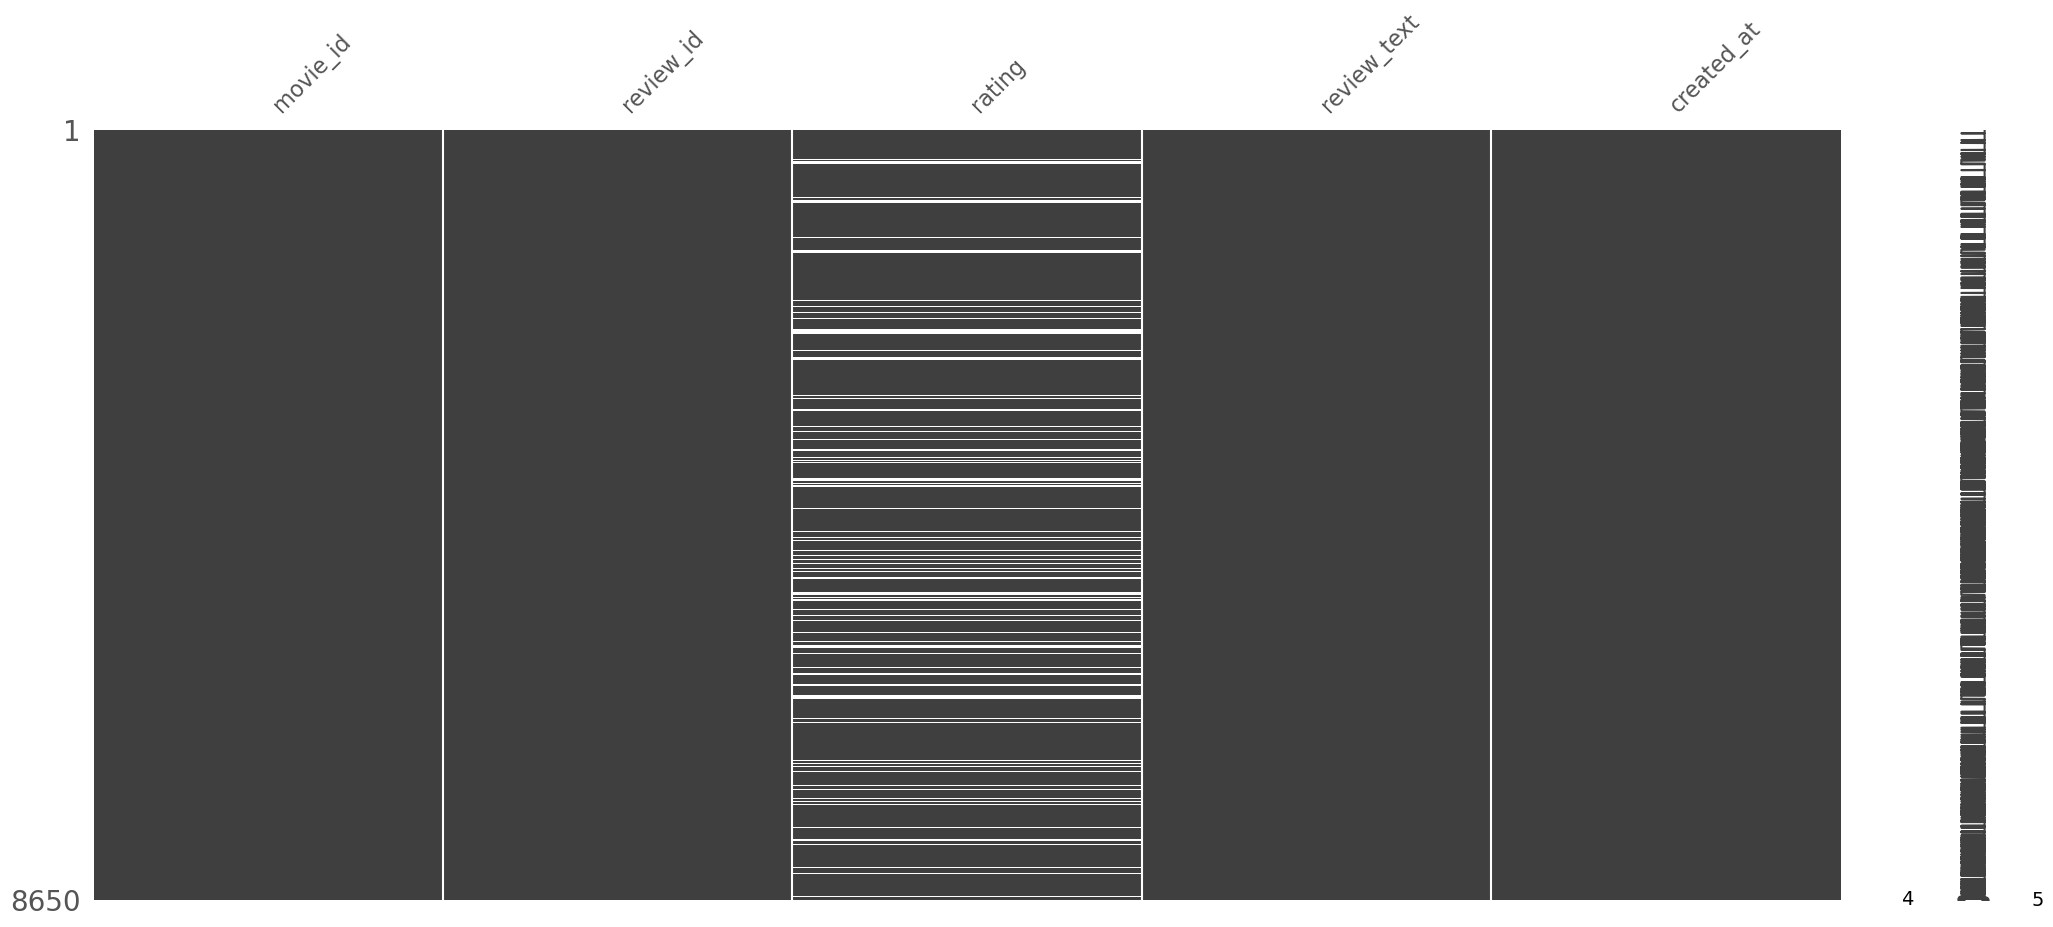

In [15]:
import missingno 
missingno.matrix(df)

In [16]:
df = df.dropna(subset=['rating'])
df

,movie_id,review_id,rating,review_text,created_at
0,843,64ecc16e83901800af821d50,7.0,"This is a fine piece of cinema from Wong Kar-Wai that tells us a story of two people whom circumstance throws together - but not in a way you might expect. We start with two couples who move into a new building. One a newspaper man with his wife,...",2023-08-28 15:46:55.026000+00:00
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00
2,7443,5bb5ac829251410dcb00810c,6.0,"Made my roommate who hates stop-motion animation watched this in 2018 and even he had a good time. It's maybe not as great as I remember thinking it was when I was a little kid, but it still holds up to some degree.\r\n\r\n_Final rating:★★★ - I l...",2018-10-04 06:00:34.227000+00:00
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00
4,7443,64ecc027594c9400ffe77c91,7.0,"Ok, there is an huge temptation to riddle this review with puns - but I'm just going to say it's a cracking little family adventure. It's seemingly based on a whole range of classic movies from the ""Great Escape"", ""Star Trek"" to ""Love Story"" with...",2023-08-28 15:41:27.525000+00:00
...,...,...,...,...,...
8645,575264,64ba5c5706f98400e1169ed0,7.0,"I'm not really a great fan of Tom Cruise. Yes, he does his own stunts and is as fit as a fiddle, but as an actor - well don't let's have too many scenes that require him to actually put his heart and soul into them. Luckily, there are only a few ...",2023-07-21 10:22:15.048000+00:00
8646,575264,64bdab4dad50f0013b127c02,6.0,"Spectacular cinematic action let down by an incoherent story and shallow characterisations. \r\n\r\nAs is almost always the case with the MI franchise, the latest offering dishes up spectacular, highly polished, explosive action. Regrettably it c...",2023-07-23 22:35:58.004000+00:00
8647,575264,64cca28c43cd5400add62db6,9.0,"The Tom Cruise “Mission Impossible” franchise is one of reliable quality and equally dependable “forgettable-ness.” I’ve seen every film, yet my memory is fuzzy when I try to recall what happened in any of them. And while it’s almost a given that...",2023-08-04 07:02:36.097000+00:00
8648,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervious one. But loved it,2023-10-17 08:44:40.250000+00:00


In [17]:
df['rating'].value_counts(dropna=False)

7.0     1576
6.0     1386
8.0     1259
5.0      732
9.0      616
10.0     564
4.0      514
1.0      284
3.0      254
2.0      153
7.5       27
8.5       23
6.5       22
9.5       15
0.5       10
5.5        6
3.5        4
4.5        4
1.5        3
2.5        2
Name: rating, dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

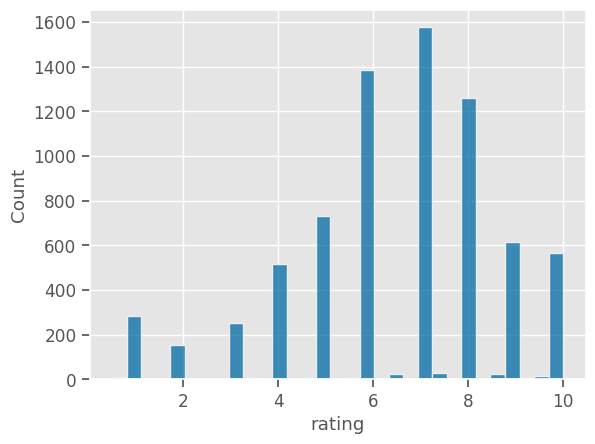

In [18]:
sns.histplot(df['rating'])

In [19]:
df['rating'].describe()

count    7454.000000
mean        6.497854
std         2.159961
min         0.500000
25%         5.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: rating, dtype: float64

### Set the Target

In [20]:
target_bins = pd.cut(df['rating'], bins = [0,5,7,10], labels=['Low','Mid','High'])

target_bins.value_counts(1)

Mid     0.401127
High    0.335927
Low     0.262946
Name: rating, dtype: float64

In [ ]:
df['target'] = target_bins.copy()

In [ ]:
## TO MAKE A BINARY TASK
df['target'] = df['target'].replace('OK',None)
df = df.dropna(subset=['target'])

In [19]:
# df = df.copy()

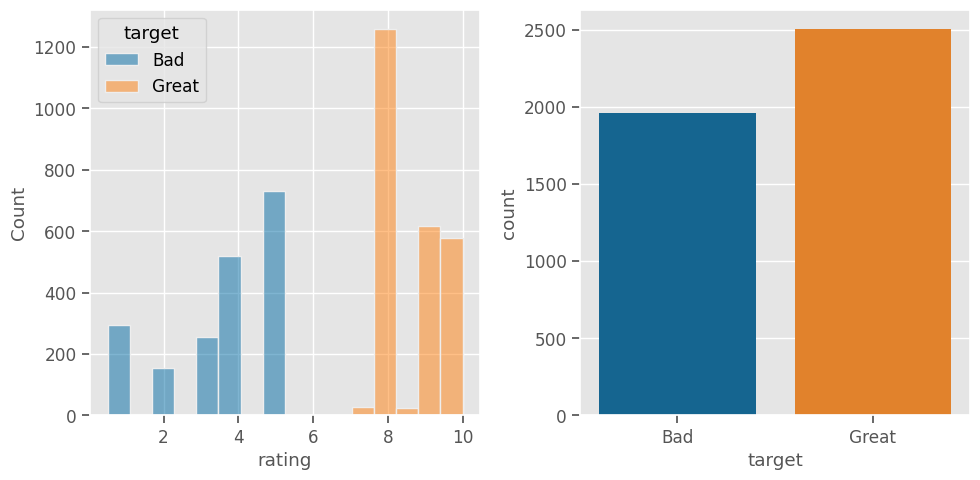

In [20]:
fig, axes =  plt.subplots(ncols=2, figsize=(10,5))
sns.histplot(data=df, x='rating', hue='target', ax=axes[0])
sns.countplot(data=df, x='target', ax=axes[1])
fig.tight_layout()

In [21]:
# pd.cut(df['rating'] ,bins=3).value_counts(1)

In [22]:
df['length'] = df['review_text'].map(lambda x: len(x.split()))
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4464 entries, 1 to 8649
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   movie_id     4464 non-null   int64   
 1   review_id    4464 non-null   object  
 2   rating       4464 non-null   float64 
 3   review_text  4464 non-null   object  
 4   created_at   4464 non-null   object  
 5   target       4464 non-null   category
 6   length       4464 non-null   int64   
dtypes: category(1), float64(1), int64(2), object(3)
memory usage: 248.6+ KB


/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_2134/3440419686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df['review_text'].map(lambda x: len(x.split()))


,movie_id,review_id,rating,review_text,created_at,target,length
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340
6,955,57b2d23dc3a36837d7000b14,3.0,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",2016-08-16 08:43:41.296000+00:00,Bad,120
7,955,5e9120963679a10018375490,2.0,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2020-04-11 01:42:46.016000+00:00,Bad,94


<Axes: xlabel='length', ylabel='Count'>

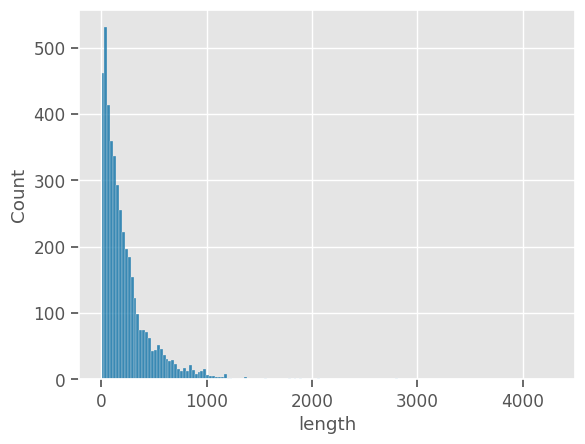

In [23]:
sns.histplot(data=df, x='length')

In [24]:
df = df.loc[ df['length']<1000]
df

,movie_id,review_id,rating,review_text,created_at,target,length
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340
6,955,57b2d23dc3a36837d7000b14,3.0,"The first underwhelmed me, but this one straight-up bored me. Again, of course seeing Hunt climb a mountain without a harness is impressive sure. And I even quite liked the idea behind the villain of the piece (though even that angle was woefully...",2016-08-16 08:43:41.296000+00:00,Bad,120
7,955,5e9120963679a10018375490,2.0,After quite entertainign Mission Impossible I the second installment turned out ... terrible. As if the screenwriters didn't know how to fill the 2 hrs with action the overuse of heroic slow motion scenes is horrible. You almost might need a barf...,2020-04-11 01:42:46.016000+00:00,Bad,94
...,...,...,...,...,...,...,...
8639,565770,6529c2000929f6010090f513,10.0,"I mean, it's not bad. It has the message, but it isn't screamed at you at the top of it's lungs like most movies are these days. In fact, it's so subtle that it's not even much of a distraction. \r\n\r\nNot that it doesn't have it's distractio...",2023-10-13 22:17:36.108000+00:00,Great,240
8643,575264,64b2f2fcc8a2d400e3933e94,8.0,"FULL SPOILER-FREE REVIEW @ https://www.firstshowing.net/2023/review-mi-dead-reckoning-part-one-is-a-summer-blockbuster-in-its-purest-form/\r\n\r\n""Mission: Impossible - Dead Reckoning Part One delivers precisely what it set out to do: stunningly ...",2023-07-15 19:26:52.558000+00:00,Great,122
8647,575264,64cca28c43cd5400add62db6,9.0,"The Tom Cruise “Mission Impossible” franchise is one of reliable quality and equally dependable “forgettable-ness.” I’ve seen every film, yet my memory is fuzzy when I try to recall what happened in any of them. And while it’s almost a given that...",2023-08-04 07:02:36.097000+00:00,Great,629
8648,575264,652e4978caef2d0139df3b6c,8.0,It was a good movie. Not better than the pervious one. But loved it,2023-10-17 08:44:40.250000+00:00,Great,14


In [25]:
# (df['length']<1000).value_counts()

In [26]:
df['target'].value_counts(1)

Great    0.557179
Bad      0.442821
Name: target, dtype: float64

## Define Target/Groups

In [27]:
import spacy

# nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp = fn.nlp.make_custom_nlp(contractions=[],#"wasn't","isn't","won't", "I'll"],
                        stopwords_to_remove=[],
                        stopwords_to_add=['★'],disable=['ner'])

In [28]:

def batch_preprocess_texts(
	texts,
	nlp=None,
	remove_stopwords=True,
	remove_punct=True,
	use_lemmas=False,
	disable=["ner"],
	batch_size=50,
	n_process=-1,
):
	"""Efficiently preprocess a collection of texts using nlp.pipe()

	Args:
		texts (collection of strings): collection of texts to process (e.g. df['text'])
		nlp (spacy pipe), optional): Spacy nlp pipe. Defaults to None; if None, it creates a default 'en_core_web_sm' pipe.
		remove_stopwords (bool, optional): Controls stopword removal. Defaults to True.
		remove_punct (bool, optional): Controls punctuation removal. Defaults to True.
		use_lemmas (bool, optional): lemmatize tokens. Defaults to False.
		disable (list of strings, optional): named pipeline elements to disable. Defaults to ["ner"]: Used with nlp.pipe(disable=disable)
		batch_size (int, optional): Number of texts to process in a batch. Defaults to 50.
		n_process (int, optional): Number of CPU processors to use. Defaults to -1 (meaning all CPU cores).

	Returns:
		list of tokens
	"""
	# from tqdm.notebook import tqdm
	from tqdm import tqdm

	if nlp is None:
		nlp = spacy.load("en_core_web_sm")

	processed_texts = []

	for doc in tqdm(nlp.pipe(texts, disable=disable, batch_size=batch_size, n_process=n_process)):
		tokens = []
		for token in doc:
			# Check if should remove stopwords and if token is stopword
			if (remove_stopwords == True) and (token.is_stop == True):
				# Continue the loop with the next token
				continue

			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_punct == True):
				continue
                
			# Check if should remove stopwords and if token is stopword
			if (remove_punct == True) and (token.is_space == True):
				continue

			## Determine final form of output list of tokens/lemmas
			if use_lemmas:
				tokens.append(token.lemma_.lower())
			else:
				tokens.append(token.text.lower())

		processed_texts.append(tokens)
	return processed_texts


In [29]:
%%time
if LOAD_PREVIOUS == False:
    df = df.copy()
    df['tokens-dirty'] = batch_preprocess_texts(df['review_text'],
                                                remove_stopwords=False, 
                                                remove_punct=True, 
                                                use_lemmas=False)
    df['tokens'] = batch_preprocess_texts(df['review_text'],
                                          remove_stopwords=True,
                                          remove_punct=True,
                                         use_lemmas=False)
    df['lemmas'] =  batch_preprocess_texts(df['review_text'],remove_stopwords=True, remove_punct=True, use_lemmas=True)

    ## Make string versions of processed text
    df['tokens-dirty-combined'] = df['tokens-dirty'].map(lambda x:" ".join(x))
    df['tokens-combined'] = df['tokens'].map(lambda x:" ".join(x))
    df['lemmas-combined'] = df['lemmas'].map(lambda x:" ".join(x))
df.head()

4381it [00:42, 103.07it/s]
4381it [00:40, 107.75it/s]
4381it [00:41, 105.60it/s]


CPU times: user 20 s, sys: 4.34 s, total: 24.3 s
Wall time: 2min 5s


,movie_id,review_id,rating,review_text,created_at,target,length,tokens-dirty,tokens,lemmas,tokens-dirty-combined,tokens-combined,lemmas-combined
1,7443,57086ff5c3a3681d29001512,9.0,"A guilty pleasure for me personally, as I love both 'The Great Escape' and most of the works I have seen, over the years, from this rightfully-esteemed British animation company. Highly recommended both for children and for adults who enjoy anima...",2016-04-09 02:59:01.116000+00:00,Great,41,"[a, guilty, pleasure, for, me, personally, as, i, love, both, the, great, escape, and, most, of, the, works, i, have, seen, over, the, years, from, this, rightfully, esteemed, british, animation, company, highly, recommended, both, for, children,...","[guilty, pleasure, personally, love, great, escape, works, seen, years, rightfully, esteemed, british, animation, company, highly, recommended, children, adults, enjoy, animation]","[guilty, pleasure, personally, love, great, escape, work, see, year, rightfully, esteem, british, animation, company, highly, recommend, child, adult, enjoy, animation]",a guilty pleasure for me personally as i love both the great escape and most of the works i have seen over the years from this rightfully esteemed british animation company highly recommended both for children and for adults who enjoy animation,guilty pleasure personally love great escape works seen years rightfully esteemed british animation company highly recommended children adults enjoy animation,guilty pleasure personally love great escape work see year rightfully esteem british animation company highly recommend child adult enjoy animation
3,7443,5f0c53a013a32000357ec505,8.0,"A very good stop-motion animation!\r\n\r\n<em>'Chicken Run'</em>, which I watched a crap tonne when I was little but not for a vast number of years now, is an impressive production given it came out in 2000. Despite a pretty simple feel to the fi...",2020-07-13 12:29:20.853000+00:00,Great,135,"[a, very, good, stop, motion, animation, <, em>'chicken, run'</em, >, which, i, watched, a, crap, tonne, when, i, was, little, but, not, for, a, vast, number, of, years, now, is, an, impressive, production, given, it, came, out, in, 2000, despite...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watched, crap, tonne, little, vast, number, years, impressive, production, given, came, 2000, despite, pretty, simple, feel, film, developed, concept, admittedly, short, run, time, trul...","[good, stop, motion, animation, <, em>'chicken, run'</em, >, watch, crap, tonne, little, vast, number, year, impressive, production, give, come, 2000, despite, pretty, simple, feel, film, develop, concept, admittedly, short, run, time, truly, fly...",a very good stop motion animation < em>'chicken run'</em > which i watched a crap tonne when i was little but not for a vast number of years now is an impressive production given it came out in 2000 despite a pretty simple feel to the film it 's ...,good stop motion animation < em>'chicken run'</em > watched crap tonne little vast number years impressive production given came 2000 despite pretty simple feel film developed concept admittedly short run time truly flies course looks relatively ...,good stop motion animation < em>'chicken run'</em > watch crap tonne little vast number year impressive production give come 2000 despite pretty simple feel film develop concept admittedly short run time truly fly course look relatively terrific ...
5,955,56863ac592514132db01c0f5,5.0,This is a decent enough mindless action movie with a lot of over the top action but it is not really a Mission Impossible movie. The movie starts of reasonably well being somewhat intelligent with a bit of Mission Impossible feel to it. It is act...,2016-01-01 08:37:25.082000+00:00,Bad,340,"[this, is, a, decent, enough, mindless, action, movie, with, a, lot, of, over, the, top, action, but, it, is, not, really, a, mission, impossible, movie, the, movie, starts, of, reasonably, well, being, s

## Group EDA

In [30]:
# Save the joined text and list of tokens for each group
GROUP_TEXTS = {}

for class_ in df['target'].unique():
    # Isolate group
    group_rows = df.loc[ df['target']==class_]
    # Join reviews 
    text = "\n".join(group_rows['review_text'])
    
    # Combine columns of lists into 1 list
    tokens = group_rows['tokens'].sum()

    dirty_tokens = group_rows['tokens-dirty'].sum()
    # Save text and tokens for group
    GROUP_TEXTS[class_] = dict(text=text, tokens=tokens, tokens_dirty=dirty_tokens)
    
GROUP_TEXTS.keys()

dict_keys(['Great', 'Bad'])

### Save Full/EDA/Joblib

In [31]:
## SAVE DF TO CSV/DF TO JOBLIB/ GROUP_TEXTS TO JOBLIB
# Fpaths for saving eda data
fpath_eda_data =FPATHS['data']['raw']['eda']
fpath_eda_joblib =FPATHS['data']['raw']['eda-joblib']
fpath_group_dict = FPATHS['data']['raw']['groups-dict']


# if LOAD_PREVIOUS == False:

# Update to_csv compression based on fname
if fpath_eda_data.endswith('.gz'):
    compression='gzip'
else:
    compression = None
df.to_csv(fpath_eda_data, index=False, compression=compression)

# Save the joblib files
joblib.dump(df,fpath_eda_joblib )
joblib.dump(GROUP_TEXTS,fpath_group_dict )


['Data-NLP/grouped-data-dict.joblib']

In [32]:
# LOAD_PREVIOUS = True


# fpath_eda_data =FPATHS['data']['raw']['eda']
# fpath_eda_joblib =FPATHS['data']['raw']['eda-joblib']
# fpath_group_dict = FPATHS['data']['raw']['groups-dict']


# # df = pd.read_csv(fpath_eda_data)
# # df.info()
# # display(df.head())
# df = joblib.load(fpath_group_dict)
# GROUP_TEXTS = joblib.load(fpath_group_dict)

In [33]:
# GROUP_TEXTS['OK']['tokens']

In [34]:
from nltk.probability import FreqDist

# freq_poe = FreqDist()
# freq_poe.most_common(25)

### Wordclouds

In [35]:
from wordcloud import WordCloud, STOPWORDS

# V2 - all dictionary saving the proportions of the pixels width height 
# - Want taller figures so can fit side by side
ratios = {'height':1 ,
         'width':1,
         'base_pixels':800,
         'base_inches':5}

# Calculate pixel width and height using same base value * width/height ratio
cloud_width =  int(ratios['base_pixels'] * ratios['width'])
cloud_height = int(ratios['base_pixels'] * ratios['height'])

print(f"- WordCloud Width, Height (in pixels): ({cloud_width}, {cloud_height}")

# Calculate figure (inches) width and height using same base value * width/height ratio
fig_width = int(ratios['base_inches'] * ratios['width'])
fig_height = int(ratios['base_inches'] * ratios['height'])
print(f"- Figure Width, Height (in pixels): ({fig_width}, {fig_height})")

## Package 
cloud_kws = dict(random_state=0,
    width=cloud_width, 
    height=cloud_height,
                 # stopwords=custom_stopwords,
    min_word_length=2,
                 
                collocations=True)

- WordCloud Width, Height (in pixels): (800, 800
- Figure Width, Height (in pixels): (5, 5)


In [36]:
GROUP_TEXTS.keys()

dict_keys(['Great', 'Bad'])

In [37]:
GROUP_TEXTS['Bad'].keys()

dict_keys(['text', 'tokens', 'tokens_dirty'])

In [38]:
# WordCloud.g

Text(0.5, 1.05, 'Comparing Groups')

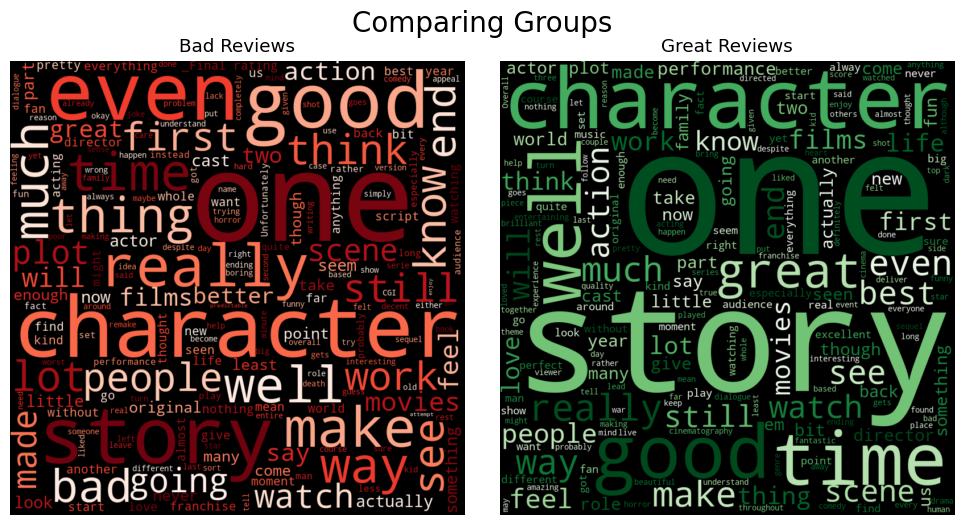

In [39]:
from wordcloud import WordCloud
custom_stopwords = [ *STOPWORDS,'movie','film']


# Create an instance of a WordCloud and use the generate method
bad_cloud = WordCloud(colormap="Reds",stopwords=custom_stopwords,
                      **cloud_kws).generate_from_text(GROUP_TEXTS["Bad"]['text'])
great_cloud = WordCloud(colormap="Greens",stopwords=custom_stopwords ,
                        **cloud_kws).generate_from_text(GROUP_TEXTS["Great"]['text'])


# Plot the wordclouds side by side
fig, axes = plt.subplots(ncols=2, figsize=(fig_width*2, fig_height))

axes[0].imshow(bad_cloud, interpolation='bilinear')
axes[0].set_title("Bad Reviews")

axes[1].imshow(great_cloud, interpolation='bilinear')
axes[1].set_title("Great Reviews")

[ax.axis('off') for ax in axes]
fig.tight_layout();

fig.suptitle('Comparing Groups', fontsize=20, y=1.05)

In [40]:
# fpath_wc = "EDA/wordclouds-01.png"
fpath_wc  = FPATHS['eda']['wordclouds']

fig.savefig(fpath_wc, dpi=300, transparent=False, bbox_inches='tight')
# FILEPATHS['eda-word-cloud'] = fpath_wc

In [41]:
# from wordcloud import WordCloud, STOPWORDS
# custom_stopwords = [ *STOPWORDS,'movie','film']


# for group_name, group_docs in GROUP_TEXTS.items():
    
# # for chapter_name, chapter_text in Alice.items():
# # for author_name in df['author'].unique():
#     # author_text = "\n\n".join(df.loc[df['author']==author_name, 'text'])
#     # group_texts = "\n\n".join(group_docs['tokens'])
#     group_texts = group_docs['text']
#     wordcloud = WordCloud(width=800, height=400, 
#                           collocation_threshold=10,#colormap='Greens',
#                           stopwords=custom_stopwords,
#                      ).generate(group_texts)
    
#     # Display the generated image
#     fig, ax = plt.subplots(figsize=(10, 5))
#     ax.imshow(wordcloud, interpolation="bilinear")
#     ax.set_title(group_name)
#     ax.axis("off")
#     plt.show()


In [42]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    freq = FreqDist(docs['tokens'])
    display(freq.most_common(25))
    # ax= freq.plot(25)
    # ax.set_title(group)
    # fig = ax.get_figure()
    # fig.show()


- Great


[('film', 3915),
 ('movie', 3657),
 ('like', 2023),
 ('story', 1814),
 ('good', 1389),
 ('great', 1258),
 ('time', 1226),
 ('action', 946),
 ('best', 927),
 ('character', 921),
 ('watch', 921),
 ('way', 850),
 ('characters', 829),
 ('movies', 772),
 ('films', 744),
 ('life', 666),
 ('people', 660),
 ('cast', 634),
 ('world', 597),
 ('love', 592),
 ('man', 561),
 ('>', 560),
 ('end', 552),
 ('think', 549),
 ('know', 538)]


- Bad


[('movie', 2592),
 ('film', 2473),
 ('like', 1592),
 ('good', 1114),
 ('story', 952),
 ('time', 737),
 ('bad', 649),
 ('way', 587),
 ('character', 585),
 ('action', 556),
 ('characters', 540),
 ('plot', 488),
 ('work', 486),
 ('better', 485),
 ('know', 482),
 ('people', 467),
 ('watch', 467),
 ('movies', 462),
 ('lot', 457),
 ('films', 451),
 ('great', 427),
 ('going', 423),
 ('think', 422),
 ('final', 405),
 ('pretty', 404)]

In [43]:
for group, docs in GROUP_TEXTS.items():
    print(f"\n- {group}")
    ngram_df = fn.nlp.get_ngram_measures_finder(docs['tokens'], ngrams=2, top_n=25, get_scores_df=True)
    display(ngram_df)


- Great


,Words,Raw Freq
0,"(special, effects)",0.000527
1,"(sci, fi)",0.000499
2,"(comic, book)",0.000424
3,"(good, movie)",0.000329
4,"(real, life)",0.000321
5,"(action, movie)",0.000313
6,"(john, wick)",0.000285
7,"(feel, like)",0.000277
8,"(spoiler, free)",0.000277
9,"(watch, movie)",0.000262



- Bad


,Words,Raw Freq
0,"(final, rating:)",0.001072
1,"(rating:, ½)",0.001072
2,"(final, rating)",0.000791
3,"(appealed, work)",0.000659
4,"(lot, appealed)",0.000659
5,"(special, effects)",0.000659
6,"(½, lot)",0.000659
7,"(finished, product)",0.000587
8,"(appeal, poor)",0.000575
9,"(poor, finished)",0.000575


### Scattertext

In [44]:
# !pip install scattertext

In [45]:
# from IPython.display import IFrame
import scattertext as st
from scattertext import (
    SampleCorpora,
    produce_scattertext_explorer,
    produce_scattertext_html,
)
from scattertext.CorpusFromPandas import CorpusFromPandas

In [46]:
# nlp = spacy.load('en_core_web_sm')
corpus = st.CorpusFromPandas(
    df, category_col="target",
    text_col='review_text', #"lemmas-joined", 
    nlp=nlp,
).build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True)

In [47]:
# Create html visualization
scatter_fname = FPATHS['eda']['scattertext'] #'EDA/scattertext.html'
# FILEPATHS['eda-scattertext'] = scatter_fname

os.makedirs(os.path.dirname(scatter_fname), exist_ok=True)

html = st.produce_scattertext_explorer(
    corpus,
    category="Great",
    category_name="High Ratings",
    not_category_name="Low Ratings",
    # minimum_term_frequency=3,
    width_in_pixels=800, height_in_pixels=600,
    metadata=df["review_text"],
    # x_label="1-Star Reviews",
    # y_label="5-Star Reviews"
)

with  open(scatter_fname, 'wb') as f:
    f.write(html.encode('utf-8'))
    
print(f'Open {scatter_fname} in Chrome or Firefox.')

Open EDA/scattertext.html in Chrome or Firefox.


## Modeling

In [48]:
from sklearn.feature_extraction.text import (
    ENGLISH_STOP_WORDS,
    CountVectorizer,
    TfidfTransformer,
    TfidfVectorizer,
)

In [49]:
X = df['review_text']#.astype(str)
y = df['target']#.astype(int)
y.value_counts(1)

Great    0.557179
Bad      0.442821
Name: target, dtype: float64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,
                                                    random_state=321)
X_train.head()

4844    Split was a movie that I was a bit weary to see, I had been bitten by M. Knight before and I wasn't sure if this movie would be worth while. But the trailers looked great and I had always thought James McAvoy was a seriously underrated actor. \r\...
1071                                                                                       One of my favorite movies of all time again. Love this movie! I love movies that have a storyline that's not common in a lot of movies. Thus is also really hilarious.
5378    I have put off viewing this film for quite a while. The main reason for this is that I am somewhat reluctant watching a movie where the story is pretty well known before you sit down to watch it. However a few days ago I finally did and, given al...
5393    **An excellent film, which deserves our attention.**\r\n\r\nI saw this movie yesterday. I've been thinking about it for a while, and yesterday I took the opportunity to do so. I already had a notion that it was a very 

In [51]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import MultinomialNB


In [52]:
vectorizer = CountVectorizer(stop_words=None,
    ngram_range=(1,2))

clf_bayes = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',MultinomialNB())
])
vectorizer.fit(X_train)
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)
# X_train_vec

CountVectorizer(ngram_range=(1, 2))

In [53]:
# Saves vocab - matches number of columns above
vocab_dict = vectorizer.vocabulary_
len(vocab_dict)

303374

In [54]:
# Words are now the feature_names
feature_names = vectorizer.get_feature_names_out()
len(feature_names)

303374

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      0.99      1.00      1433
       Great       0.99      1.00      1.00      1852

    accuracy                           1.00      3285
   macro avg       1.00      1.00      1.00      3285
weighted avg       1.00      1.00      1.00      3285



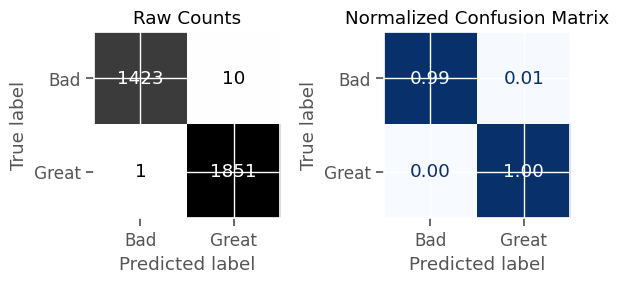


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.95      0.55      0.70       507
       Great       0.72      0.98      0.83       589

    accuracy                           0.78      1096
   macro avg       0.84      0.77      0.76      1096
weighted avg       0.83      0.78      0.77      1096



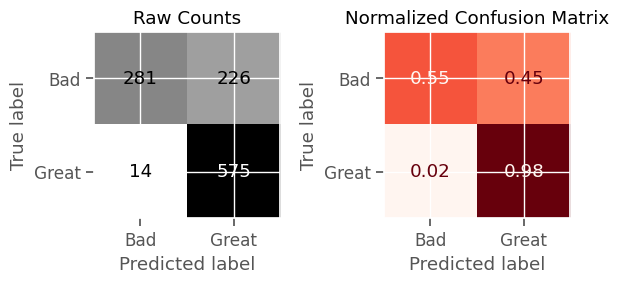

In [55]:

clf_bayes.fit(X_train, y_train)
fn.evaluate.evaluate_classification(clf_bayes, X_train,y_train, X_test, y_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       1.00      1.00      1.00      1433
       Great       1.00      1.00      1.00      1852

    accuracy                           1.00      3285
   macro avg       1.00      1.00      1.00      3285
weighted avg       1.00      1.00      1.00      3285



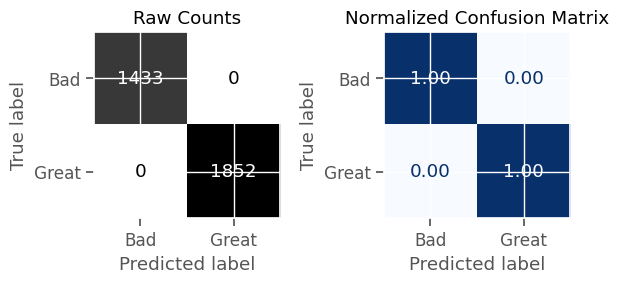


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         Bad       0.92      0.64      0.75       507
       Great       0.75      0.95      0.84       589

    accuracy                           0.81      1096
   macro avg       0.83      0.80      0.80      1096
weighted avg       0.83      0.81      0.80      1096



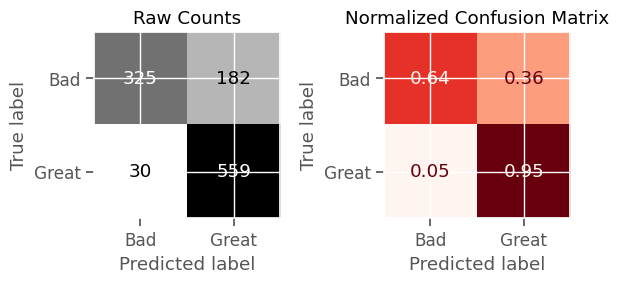

In [56]:

clf_rf = Pipeline([
    ('vectorizer',vectorizer),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])
clf_rf.fit(X_train, y_train)

fn.evaluate.evaluate_classification(clf_rf, X_train,y_train, X_test, y_test)

### Saving ML Modeling Assets

In [57]:
# Getting the filepath for the training data
joblib_train = FPATHS['data']['ml']['train']
joblib_test = FPATHS['data']['ml']['test']

# Saving x-train and y-train 
joblib.dump([X_train, y_train], joblib_train)
joblib.dump([X_test, y_test], joblib_test)

['Data-NLP/testing-data.joblib']

In [58]:
joblib_bayes = FPATHS['models']['ml']['bayes']['saved_model']
joblib_forest = FPATHS['models']['ml']['random_forest']['saved_model']

joblib.dump(clf_bayes, joblib_bayes)
joblib.dump(clf_rf, joblib_forest)

['Models/random-forest.joblib']

# Deep NLP

In [59]:
from sklearn.preprocessing import LabelEncoder

### Preparing Tensorflow Dataset Objects

In [60]:
# Define X and y
X = df['review_text']
y_string= df['target']

# Instantiate the LabelEncoder
encoder = LabelEncoder()

# Fit and Transform the strings into integers
y = pd.Series(encoder.fit_transform(y_string))
y.value_counts()

1    2441
0    1940
dtype: int64

In [61]:
target_map = dict(zip(encoder.inverse_transform(y.unique()),y.unique()))
target_map

{'Great': 1, 'Bad': 0}

In [62]:
## Saving target_map
fpath_target_map = FPATHS['metadata']['target_lookup']#"Models/target-map.json"
# FILEPATHS['modeling-target-map'] = fpath_target_map

target_info = {
    "column": "target",
    "lookup_codes":  {k:str(v) for k,v in target_map.items()},#target_map,
    "lookup_names": {str(v): k for k, v in target_map.items()},
}

target_info

{'column': 'target',
 'lookup_codes': {'Great': '1', 'Bad': '0'},
 'lookup_names': {'1': 'Great', '0': 'Bad'}}

In [63]:
import json
# os.makedirs(os.path.dirname(fpath_target_map), exist_ok=True)
with open(fpath_target_map, 'w') as f:
    json.dump(target_info,f)

# FILEPATHS['target-map'] = fpath_target_map

In [64]:
# #
# rerun above

In [65]:
encoder.inverse_transform(y.unique())

array(['Great', 'Bad'], dtype=object)

In [66]:
# Convert to Dataset Object
ds = tf.data.Dataset.from_tensor_slices((X, y))
# Shuffle dataset
ds = ds.shuffle(buffer_size=len(ds),reshuffle_each_iteration=False)

In [67]:
# Set the ratio of the train, validation, test split
split_train = .7
split_val =  .2
split_test =  1 -( split_train + split_val )
# Calculate the number of samples for training and validation data 
n_train_samples =  int(len(ds) * split_train)
n_val_samples = int(len(ds) * split_val)
n_test_samples = len(ds) -(n_train_samples + n_val_samples)
# Set the batch size
BATCH_SIZE =32
import math
# math.ceil will round up
# How many batches? 
n_train_batches = math.ceil(n_train_samples/BATCH_SIZE)
n_val_batches = math.ceil(n_val_samples/BATCH_SIZE)
n_test_batches = math.ceil(n_test_samples/BATCH_SIZE)
print(f"    - train:\t{n_train_samples} samples \t({n_train_batches} batches)")
print(f"    - val:  \t{n_val_samples} samples \t({n_val_batches} batches)")
print(f"    - test: \t{n_test_samples} samples \t({n_test_batches} batches)")



    - train:	3066 samples 	(96 batches)
    - val:  	876 samples 	(28 batches)
    - test: 	439 samples 	(14 batches)


In [68]:
# Use take and skip to define each set
train_ds = ds.take(n_train_samples).batch(batch_size=BATCH_SIZE)
# Skip over the training batches and take the validation batches
val_ds = ds.skip(n_train_samples).take(n_val_samples).batch(batch_size=BATCH_SIZE)
# Skipver the train and validation batches, the remaining are the test batches
test_ds = ds.skip(n_train_samples + n_val_samples).batch(batch_size=BATCH_SIZE)
# Confirm the number of batches in each
print (f' There are {len(train_ds)} training batches.')
print (f' There are {len(val_ds)} validation batches.')
print (f' There are {len(test_ds)} testing batches.')



 There are 96 training batches.
 There are 28 validation batches.
 There are 14 testing batches.


In [69]:
# taking a sample 
example_X, example_y= train_ds.take(1).get_single_element()
print(example_X)
print(example_y)

tf.Tensor(
[b'The Fast and Furious franchise has, since quite a few movies back, abandoned all pretense of being anything but silly, unrealistic, action extravaganzas. That means that these movies are not to everyone\xe2\x80\x99s taste (which no movies really are for that matter) but it seems a lot of those people have watched this movie anyway and then pretends to be surprised.\r\n\r\nThose who give this movie one star ratings have obviously never seen a real one star movie and those asshats that start their review with \xe2\x80\x9cI left after xx minutes\xe2\x80\x9d are just trolls. If you have not watched the movie, all of it, don\xe2\x80\x99t write a bloody \xe2\x80\x9creview\xe2\x80\x9d.\r\n\r\nTo me this movie was pretty much what I expected. Perhaps even a bit more silly and over the top than the previous ones, not that this was much of a surprise, but still more or less what I expected.\r\n\r\nIt has a half decent, quite predictable, story that\xe2\x80\x99s just good enough to 

In [70]:
## Saving Train and test dataset
fname_train_ds = FPATHS['data']['nn']['train']
train_ds.save(path=fname_train_ds,)

fname_test_ds = FPATHS['data']['nn']['test']
test_ds.save(path=fname_test_ds,)

2023-11-27 15:48:07.762595: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [71]:
# Create the TextVectorization layer
count_vectorizer = tf.keras.layers.TextVectorization(
    standardize="lower_and_strip_punctuation",
    output_mode="count"
)

In [72]:


# @tf.function
# def extract_text(x,y):
#     return x

# def fn.nlp.make_text_vectorization_layer(train_ds,  max_tokens=None, 
#                                   split='whitespace',
#                                   standardize="lower_and_strip_punctuation",
#                                   output_mode="int",
#                                   output_sequence_length=None,
#                                   ngrams=None, pad_to_max_tokens=False,
#                                   verbose=True,
#                                   **kwargs,
#                                  ):


#     # Build the text vectorization layer
#     text_vectorizer = tf.keras.layers.TextVectorization(
#         max_tokens=max_tokens,
#         standardize=standardize, 
#         output_mode=output_mode,
#         output_sequence_length=output_sequence_length,
#         **kwargs
#     )

#     # Get just the text from the training data
#     if isinstance(train_ds, (np.ndarray, list, tuple, pd.Series)):
#         ds_texts = train_ds
#     else:
#         try:
#             ds_texts = train_ds.map(extract_text)#lambda x, y: x )
#         except:
#             ds_texts = train_ds
            
#     # Fit the layer on the training texts
#     text_vectorizer.adapt(ds_texts)
    
    
#     if verbose:
#         # Print the params
#         print( "\ntf.keras.layers.TextVectorization(" )
#         config = text_vectorizer.get_config()
#         pprint(config,indent=4)
#         print(")")
               
#     # SAVING VOCAB FOR LATER
#     # Getting list of vocab 
#     vocab = text_vectorizer.get_vocabulary()
#     # Save dictionaries to look up words from ints 
#     int_to_str  = {idx:word for idx, word in enumerate(vocab)}
    
#     return text_vectorizer, int_to_str

fn.nlp.make_text_vectorization_layer

<function custom_functions.nlp_functions.make_text_vectorization_layer(train_ds, max_tokens=None, split='whitespace', standardize='lower_and_strip_punctuation', output_mode='int', output_sequence_length=None, ngrams=None, pad_to_max_tokens=False, verbose=True, **kwargs)>

<Axes: xlabel='sequence_length', ylabel='Count'>

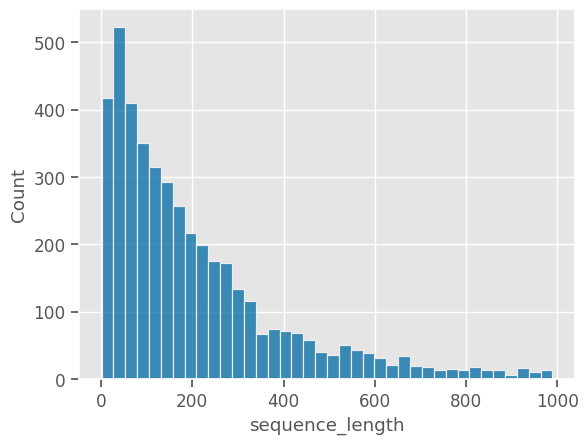

In [73]:
df['sequence_length'] = df['review_text'].map( lambda x: len(x.split(" ")))
# filter_short = df['sequence_length']< 400
sns.histplot(df['sequence_length'])

In [74]:
# Define sequence length as a variable for future use
SEQUENCE_LENGTH = 400
# Define vectorizer layer. Use the custom function to build and fit the vectorizer before using it in model
sequence_vectorizer, vocab_lookup = fn.nlp.make_text_vectorization_layer(train_ds, 
                                                                  output_mode='int', 
                                                                  output_sequence_length = SEQUENCE_LENGTH, 
                                                                  verbose=True)


tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_1',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 32667}
)


## Sequence Models

In [75]:
# Define a function for building an LSTM model
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.models import Sequential

# @tf.function
def build_lstm_model(text_vectorization_layer):
    VOCAB_SIZE = text_vectorization_layer.vocabulary_size()

    # Define sequential model with pre-trained vectorization layer and *new* embedding layer
    lstm_model = Sequential(
        [
            text_vectorization_layer,
            layers.Embedding(
                input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=SEQUENCE_LENGTH
            ),
        ]
    )

    # Add *new* LSTM layer
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.Dropout(0.3))
    lstm_model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True)))
    lstm_model.add(layers.GlobalMaxPooling1D())

    # Add output layer
    lstm_model.add(layers.Dense(len(classes), activation="softmax"))

    # Compile the model
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01, decay_steps=10000, decay_rate=0.95
    )  # 0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)
    lstm_model.compile(
        optimizer=optimizer,  #'adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    lstm_model.summary()
    return lstm_model

In [76]:
# # Code below is from CNN Week
# def get_callbacks(patience=3, monitor='val_accuracy'):
#     early_stop = tf.keras.callbacks.EarlyStopping(patience=patience, monitor=monitor, verbose=True)
#     return [early_stop]


### Call backs
# @tf.function
def get_callbacks(monitor='val_accuracy',patience=3, restore_best_weights=True,
                  start_from_epoch=0,baseline_value=None,
                  verbose_early_stopping=1,  
                  tensborboard=True, logdir="/tmp/tb_logs",
                 tb_embed_freq=0, tb_write_images = False, tb_hist_freq = 0):

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=patience, #mode=mode, 
                                                      restore_best_weights=restore_best_weights,
                                                      baseline=baseline_value,
                                                      start_from_epoch=start_from_epoch,
                                                      verbose=verbose_early_stopping)

    if tensborboard:
        tboard = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=tb_hist_freq,write_images=tb_write_images,
                                                embeddings_freq=tb_embed_freq,)
        return [ early_stopping, tboard]
    else:
        return [early_stopping]

In [77]:
EMBED_DIM = 100
classes = y_train.unique()
# Build the lstm model and specify the vectorizer
lstm_model = build_lstm_model(sequence_vectorizer)

# Defien number of epocs
EPOCHS = 30

# Fit the model
history = lstm_model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    callbacks=get_callbacks(),
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 400)              0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 400, 100)          3266700   
                                                                 
 bidirectional (Bidirectiona  (None, 400, 128)         84480     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 400, 128)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 400, 128)         98816     
 nal)                                                            
                                                        

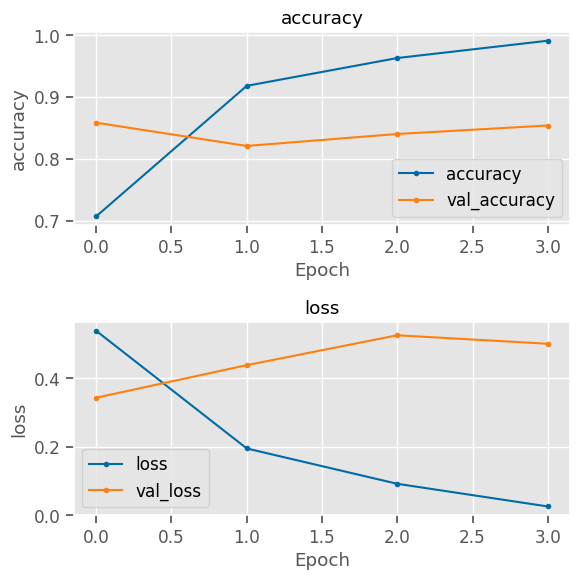


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.91      1353
           1       0.91      0.97      0.94      1713

    accuracy                           0.93      3066
   macro avg       0.93      0.92      0.93      3066
weighted avg       0.93      0.93      0.93      3066



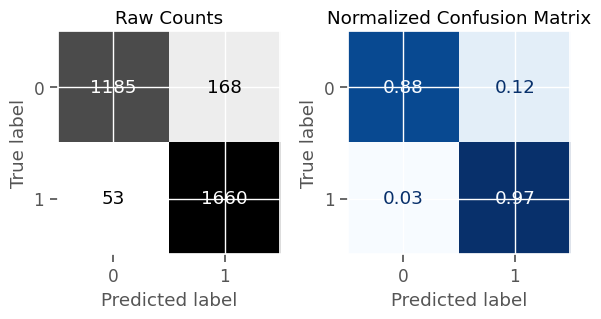


- Evaluating Training Data:
96/96 [==============================] - 7s 73ms/step - loss: 0.2212 - accuracy: 0.9279
{'loss': 0.22124327719211578, 'accuracy': 0.9279190897941589}
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       196
           1       0.82      0.89      0.85       243

    accuracy                           0.83       439
   macro avg       0.83      0.82      0.82       439
weighted avg       0.83      0.83      0.83       439



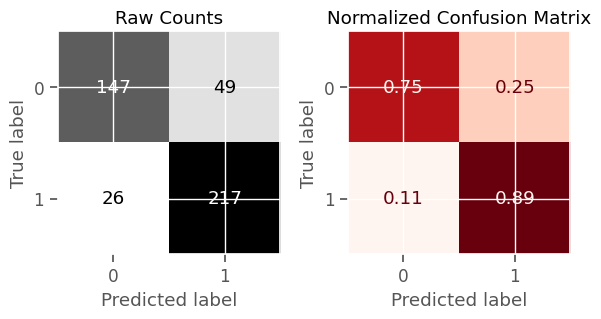


- Evaluating Test Data:
14/14 [==============================] - 1s 72ms/step - loss: 0.3590 - accuracy: 0.8292
{'loss': 0.35896578431129456, 'accuracy': 0.8291571736335754}


In [78]:
# Obtain the results
results = fn.evaluate.evaluate_classification_network(
    lstm_model, X_train=train_ds, 
    X_test=test_ds, history=history
);

### Save Model

In [79]:
fpath_lstm = FPATHS['models']['nn']['LSTM']['saved_model']
lstm_model.save(fpath_lstm, save_format='tf')

INFO:tensorflow:Assets written to: Models/keras/lstm/assets


INFO:tensorflow:Assets written to: Models/keras/lstm/assets


### Attention Models

In [80]:
from tensorflow.keras import optimizers
from tensorflow.keras import Model, Input


def build_transformer_model(text_vectorization_layer):
    """ Need to use the Function API for Attention"""
    
    MAX_TOKENS = text_vectorization_layer.vocabulary_size()
    
    input_layer = Input(shape=(SEQUENCE_LENGTH,),dtype=tf.string)
    flattened_input = tf.reshape(input_layer, (-1,))
    vectorizer_layer = text_vectorization_layer(flattened_input)
    
    embed_layer = tf.keras.layers.Embedding(input_dim=MAX_TOKENS, 
                                            output_dim=EMBED_DIM, 
                                            input_length=SEQUENCE_LENGTH)(vectorizer_layer)

    # 10/19/23: had num_heads =128, key_dim=120
    attention_layer = layers.MultiHeadAttention(num_heads=8, key_dim=50, value_dim=EMBED_DIM, dropout=0.1)(embed_layer, embed_layer,embed_layer)
    flatten_layer = layers.Flatten()(attention_layer)
    dense_layer =  layers.Dense(64, activation='relu')(flatten_layer)
    output_layer = layers.Dense(3, activation='softmax')(dense_layer)
    model = Model(inputs=input_layer, outputs=output_layer)


    
    lr_schedule = optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.01,
        decay_steps=10000,
        decay_rate=0.9)
    optimizer = optimizers.legacy.Adam(learning_rate=lr_schedule)

    
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


tf.keras.layers.TextVectorization(
{   'batch_input_shape': (None,),
    'dtype': 'string',
    'encoding': 'utf-8',
    'idf_weights': None,
    'max_tokens': None,
    'name': 'text_vectorization_2',
    'ngrams': None,
    'output_mode': 'int',
    'output_sequence_length': 400,
    'pad_to_max_tokens': False,
    'ragged': False,
    'sparse': False,
    'split': 'whitespace',
    'standardize': 'lower_and_strip_punctuation',
    'trainable': True,
    'vocabulary': None,
    'vocabulary_size': 32667}
)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 400)]        0           []                               
                                                                                                  
 tf.reshape (TFOpLambda)        (None,)              0           ['input_1[

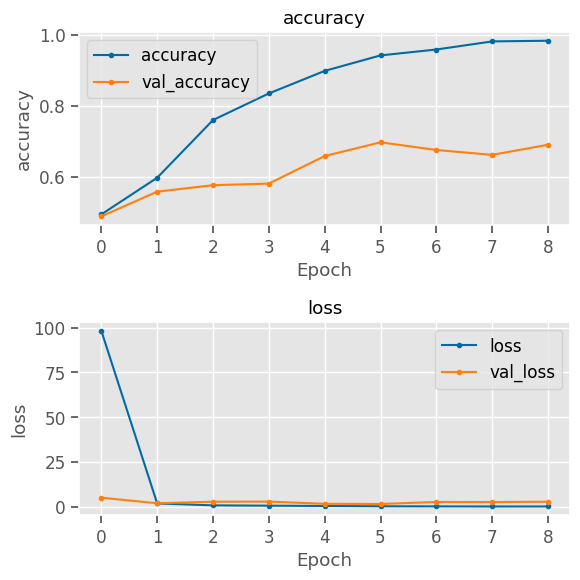


- Evaluating Network...
----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.71      0.65       196
           1       0.73      0.63      0.68       243

    accuracy                           0.67       439
   macro avg       0.67      0.67      0.66       439
weighted avg       0.67      0.67      0.67       439



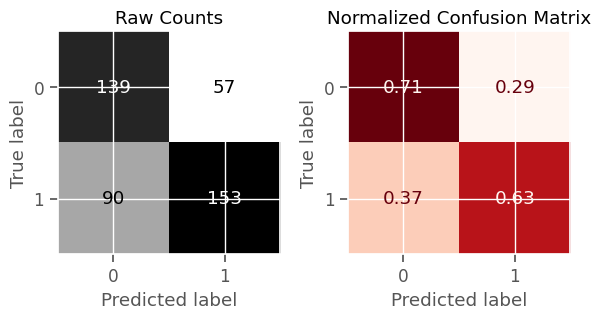


- Evaluating Test Data:
14/14 [==============================] - 3s 198ms/step - loss: 1.4014 - accuracy: 0.6651
{'loss': 1.4013806581497192, 'accuracy': 0.6651480793952942}
CPU times: user 45min 54s, sys: 5min 43s, total: 51min 37s
Wall time: 8min 7s


In [81]:
%%time

MAX_TOKENS = None  # 20_000  # Max Vocab
SEQUENCE_LENGTH = 400 #200 # Max Lenght of texts
EMBED_DIM = 200  # dimensions for Embedding layer
BATCH_SIZE_SEQ = 32


# # # Making datasets
# train_ds, val_ds, test_ds = train_val_test_datasets(
#     X, y, BATCH_SIZE=BATCH_SIZE_SEQ, verbose=True, show_class_balance=True
# )  # , show_class_balance=True)

## Make vectorizer
seq_vectorizer, int_to_str = fn.nlp.make_text_vectorization_layer( # accepts all args of TextVectorization layer
    train_ds, # training texts
    max_tokens=MAX_TOKENS,
    standardize="lower_and_strip_punctuation",
    output_mode="int",
    output_sequence_length=SEQUENCE_LENGTH,
    verbose=True,
)




## Fit and evaluate model
EPOCHS = 100
model = build_transformer_model(seq_vectorizer)
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    validation_data=val_ds,
    # class_weight=class_weights_dict,
    callbacks=get_callbacks()#start_from_epoch=2, patience=2, monitor='val_loss', mode='min',logdir="/tmp/tb_logs_attention"),
)
fn.evaluate.evaluate_classification_network(
    model, #X_train=train_ds, 
    X_test=test_ds, history=history
);

In [82]:
fpath_attn = FPATHS['models']['nn']['Attention']['saved_model']
model.save(fpath_attn, save_format='tf')

INFO:tensorflow:Assets written to: models/keras/attn/assets


INFO:tensorflow:Assets written to: models/keras/attn/assets
